In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline
from math import sqrt
from scipy.stats import iqr
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures


## Importing the data

In [228]:
simple_salary = pd.read_csv("salary.csv")

In [229]:
simple_salary.shape

(514, 11)

In [230]:
simple_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


## Checking for any missing values

In [231]:
simple_salary.isnull().any()

salary          True
exprior        False
yearsworked    False
yearsrank      False
market         False
degree         False
otherqual      False
position       False
male           False
Field          False
yearsabs       False
dtype: bool

The salary column has a missing value, I have decided to calculate the mean and use it where there are missing values.

In [232]:
# Filling in the missing value in the salary column with the mean.
simple_salary = simple_salary.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [233]:
simple_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [234]:
simple_salary = simple_salary.drop_duplicates()

From the above table we can see that the mean for salary is 50863.22. This is the value that will be used.

In [235]:
simple_salary.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

We can now see that there are no missing values since the mean has been put in place

In [236]:
stats.pearsonr(X_train['yearsworked'],X_train['salary'])

(0.6438519775788022, 1.7294812416435735e-49)

In [237]:
# setting the independent and dependant variables
X = simple_salary
y = simple_salary["salary"]

#Creating training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(411, 11) (411,)
(103, 11) (103,)


In [238]:
X_train.shape

(411, 11)

## Create histograms to show the distribution of the variables

Text(0.5, 1.0, 'Relationship between Years Worked and Salary')

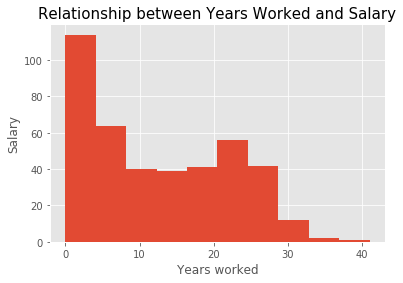

In [239]:
# Creating a histogram for years worked and salary
plt.hist(x= 'yearsworked', data=X_train, bins = 10)
# plt.figure(figsize=(13,10))
plt.style.use('ggplot')
plt.xlabel('Years worked')
plt.ylabel('Salary')
plt.title('Relationship between Years Worked and Salary', fontsize = 15)

## Create a scatterplot showing the relationship between Years Worked and Salary.

Text(0.5, 1.0, 'Relationship between Years Worked and Salary')

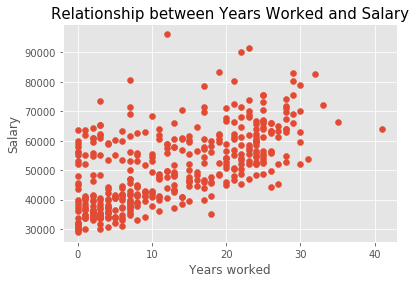

In [240]:
plt.scatter(x='yearsworked', y='salary', alpha=1, data=X_train)
plt.xlabel('Years worked')
plt.ylabel('Salary')
plt.title('Relationship between Years Worked and Salary', fontsize = 15)

The scattergraph shows a positive linear relationship between salary and yearsdworked. 

In [241]:
constant = sm.add_constant(X_train['yearsworked'])
model = sm.OLS(y_train,constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     246.8
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           7.46e-44
Time:                        15:24:16   Log-Likelihood:                -4372.7
No. Observations:                 411   AIC:                             8749.
Df Residuals:                     409   BIC:                             8757.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.022e+04    839.151     47.932      

/home/puleng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


R^2 is below 50%, it is low which means that the relationship between the variables is weak. 

## What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

The unstandardized coefficient is the amount of change in a unit of the independant variable will have on the dependant variable.

Looking at the graphs above, we do see a relationship between the dependant and inependant variable and looking at the scatterplot, we see a positive correlation meaning that an increase in the number of years worked results in the increase in the salary.

## What do the 95% confidence intervals [0.025, 0.975] mean?

A 95% confidence interval means that we are 95% confident that our interval contains the population mean.

## Calculate the expected salary for someone with 12 years’ work experience.

In [250]:
years_12 = pd.DataFrame({'yearsworked':[12]})
results.predict([1,12])

array([50238.37474348])

By calculating the mean of the salary for a person who has worked for 12 we can see that the average salary would be 52346.21

## Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [251]:
years_80 = pd.DataFrame({'yearsworked':[80]})
results.predict([1,80])

array([106995.72983117])

## We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

# Other factors to look at are:

Years worked

Position

Yearsrank

Work experience

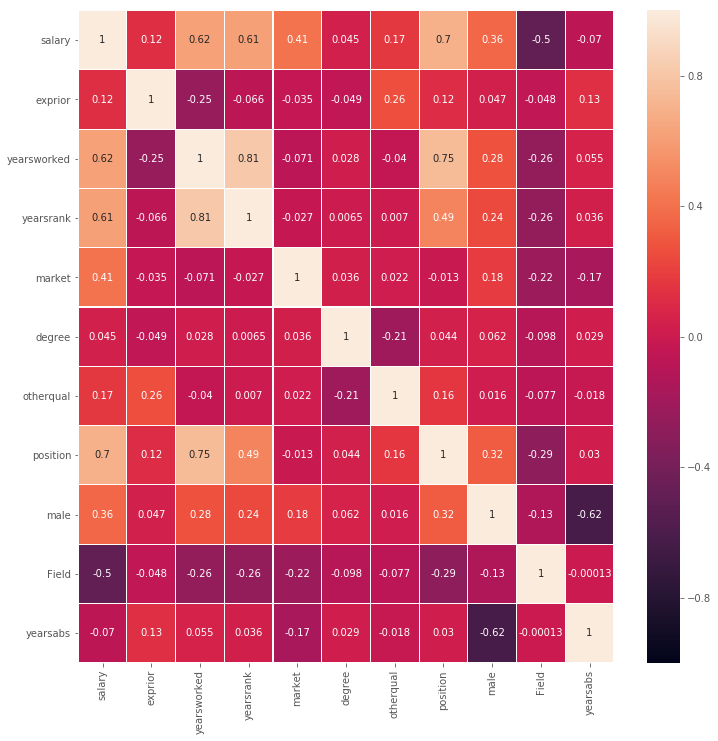

In [252]:
salary_cor = simple_salary.corr()
plt.figure(figsize=(12,12))
sns.heatmap(salary_cor, vmin=-1, vmax=1, annot=True, linewidth=0.1)

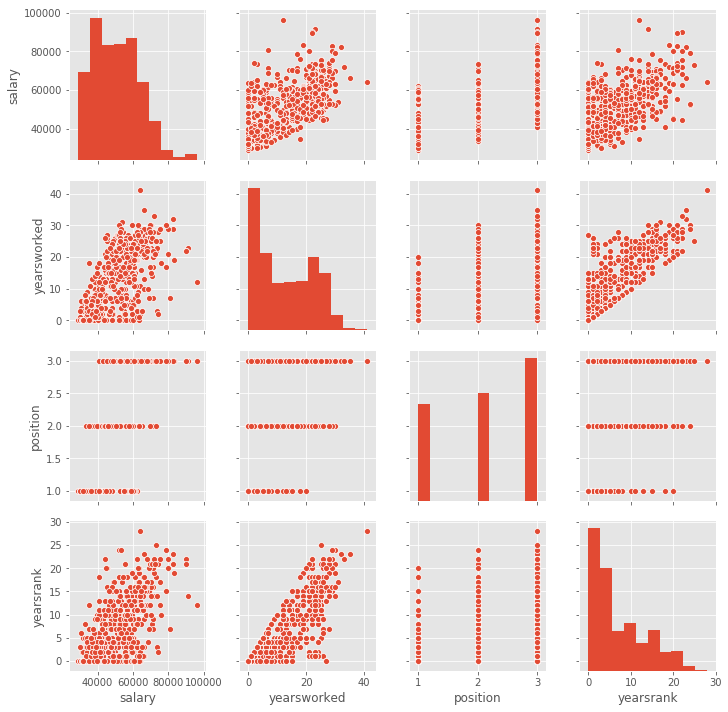

In [253]:
sns.pairplot(simple_salary[['salary', 'yearsworked', 'position', 'yearsrank']])

## Now fit your model to your test set. Simply use your existing, model, to predict salaries in the test set.

In [254]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result = pd.concat([y_test, df], axis=1, sort=False)
result

,salary,Actual,Predicted
485,50008.00000,50008.00000,52172.00000
375,89789.00000,89789.00000,55227.00000
14,37000.00000,37000.00000,48000.00000
235,64854.31250,64854.31250,42537.00000
171,76098.00000,76098.00000,48378.00000
237,63409.00000,63409.00000,68444.51563
436,32000.00000,32000.00000,53686.00000
422,34206.00000,34206.00000,63409.00000
128,48941.00000,48941.00000,80760.00000
438,36869.00000,36869.00000,44413.00000


In [260]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15553.03932805825
Mean Squared Error: 332105308.7527032
Root Mean Squared Error: 18223.756713496346
